In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [2]:
df=pd.read_csv("survey.csv")

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df=df.drop(['Timestamp','Country','state','comments','no_employees'],axis=1)

In [6]:
df.shape

(1259, 22)

In [7]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [8]:
for col in df.columns:
  print(col)

Age
Gender
self_employed
family_history
treatment
work_interfere
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence


In [9]:
for i in df.iloc[:,1:].columns:
  print(i," : ",df[i].unique(),"\n")

Gender  :  ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means'] 

self_employed  :  [nan 'Yes' 'No'] 

family_history  :  ['No' 'Yes'] 

treatment  :  ['Yes' 'No'] 

work_interfere  :  ['Often' 'Rarely' 'Never' 'Sometimes' nan] 

remote_work  :  ['No' 'Yes'] 

tech_company  :  ['Yes' 'No'] 

benefits  :  ['Yes' "Don't know" 'No'] 

care_options  :  ['Not sure' 'No' 'Yes'] 

wellness_program  :  ['No' "Don't know" 'Yes'] 

seek_help  :  ['Yes' "Don't know" 'No'] 

anonymity  :  ['Yes' "Don't

In [10]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [11]:
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [12]:
df['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [15]:
df['remote_work'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df['benefits'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [18]:
df['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [19]:
df['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [20]:
df['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [21]:
df['anonymity'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [22]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [23]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [24]:
df['phys_health_consequence'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [25]:
df['coworkers'].unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [26]:
df['supervisor'].unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

In [27]:
df['mental_health_interview'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [28]:
df['phys_health_interview'].unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [29]:
df['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [30]:
df['obs_consequence'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [32]:
L=list(df['Gender'])

In [33]:
L=[l.lower() for l in L]

In [34]:
for i in range(0,len(L)):
  if (('f' in L[i]) or('woman' in L[i]) and ('tr' not in L[i]) ):
    L[i]='female'
  elif (('m' in L[i]) or('guy' in L[i]) and ('tr' not in L[i]) ):
    L[i]='male'
  else:
    L[i]='other'
    

In [35]:
df['Gender']=L

In [36]:
df['Gender'].unique()

array(['female', 'male', 'other'], dtype=object)

In [37]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   remote_work                1259 non-null   object
 7   tech_company               1259 non-null   object
 8   benefits                   1259 non-null   object
 9   care_options               1259 non-null   object
 10  wellness_program           1259 non-null   object
 11  seek_help                  1259 non-null   object
 12  anonymity                  1259 non-null   object
 13  leave                      1259 non-null   object
 14  mental_h

In [39]:
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [40]:
X = df.iloc[:,1:22]

In [41]:
X.head()

,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,female,No,No,Yes,Often,No,Yes,Yes,Not sure,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,male,No,No,No,Rarely,No,No,Don't know,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,male,No,No,No,Rarely,No,Yes,No,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,male,No,Yes,Yes,Often,No,Yes,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,male,No,No,No,Never,Yes,Yes,Yes,No,Don't know,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


##Visualization

In [42]:
# for i in X:
#   le = LabelEncoder()
#   df[i]=le.fit_transform(df[i])

In [43]:
labelDict = {}
for i in X:
  le = LabelEncoder()
  df[i]=le.fit_transform(df[i])
  label_name="label_"+i
  label_value=le.classes_
  labelDict[label_name]=label_value


Text(0.5, 1.0, 'treated or not')

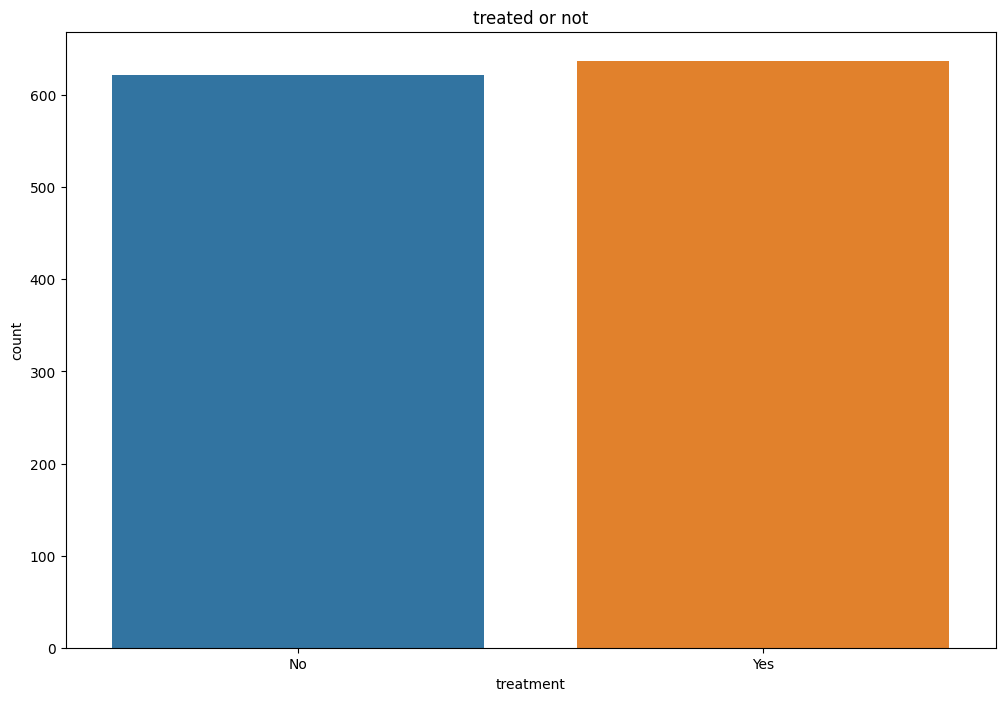

In [44]:
plt.figure(figsize=(12,8))
labels = labelDict['label_treatment']
g = sns.countplot(x=df['treatment'])
g.set_xticklabels(labels)

plt.title('treated or not')

Text(0.5, 1.0, 'Gender distribution')

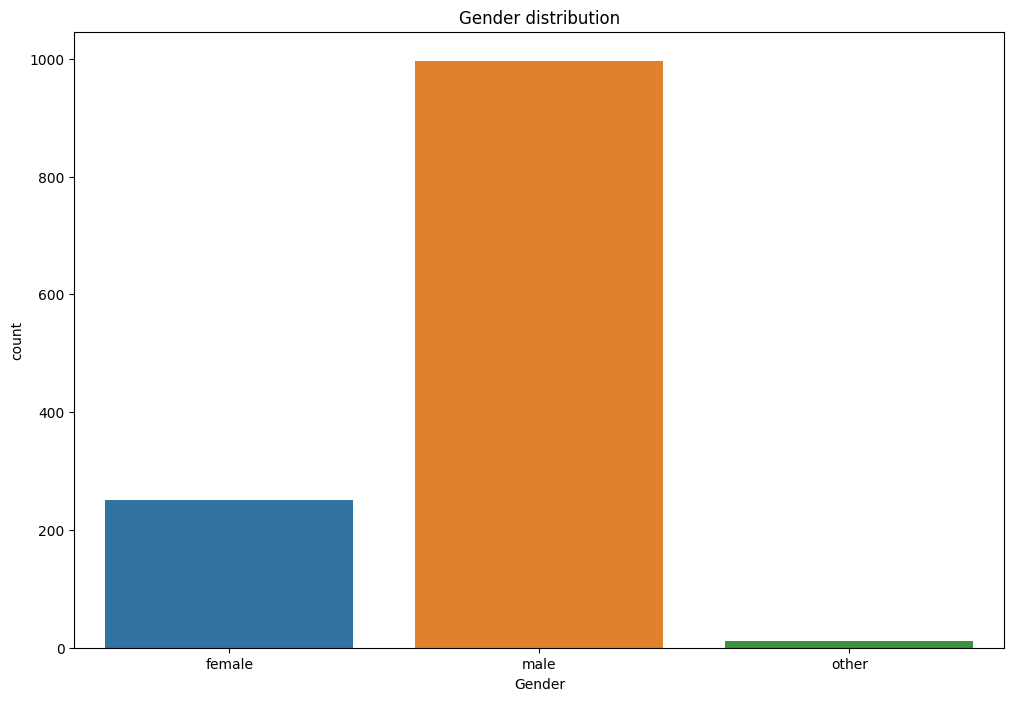

In [45]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x=df['Gender'])
g.set_xticklabels(labels)

plt.title('Gender distribution')

Text(0.5, 1.0, 'how easy is to ask for leave for mental health issues')

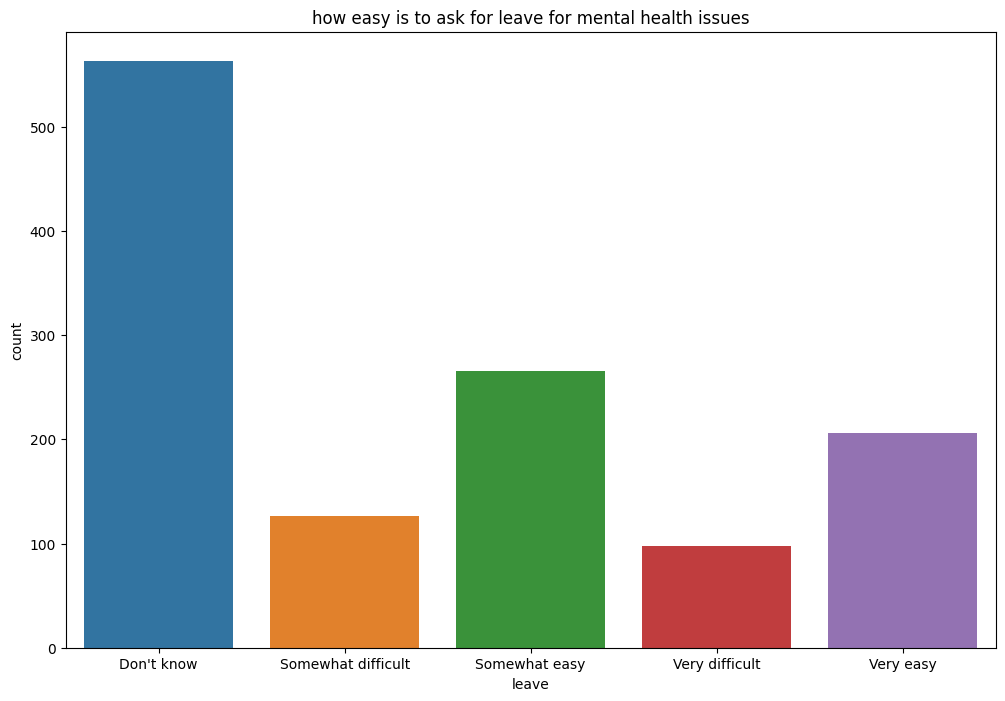

In [46]:
plt.figure(figsize=(12,8))
labels = labelDict['label_leave']
g = sns.countplot(x=df['leave'])
g.set_xticklabels(labels)

plt.title('how easy is to ask for leave for mental health issues')

Text(0, 0.5, 'count')

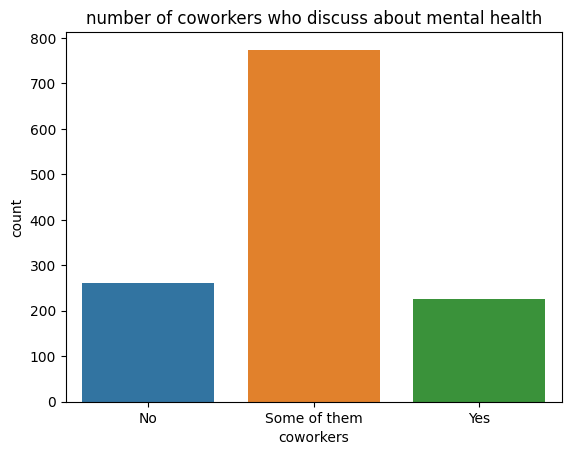

In [47]:
g=sns.countplot(data=df, x="coworkers")
labels=labelDict['label_coworkers']
g.set_xticklabels(labels)
plt.title('number of coworkers who discuss about mental health')
plt.ylabel('count')

Text(0, 0.5, 'count')

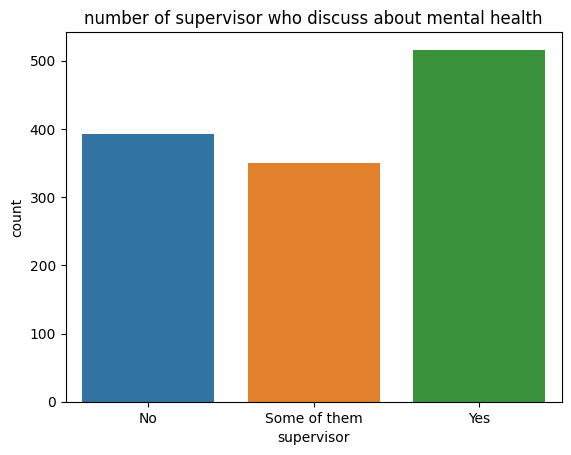

In [48]:
g=sns.countplot(data=df, x="supervisor")
labels=labelDict['label_supervisor']
g.set_xticklabels(labels)
plt.title('number of supervisor who discuss about mental health')
plt.ylabel('count')

Text(0, 0.5, 'count ')

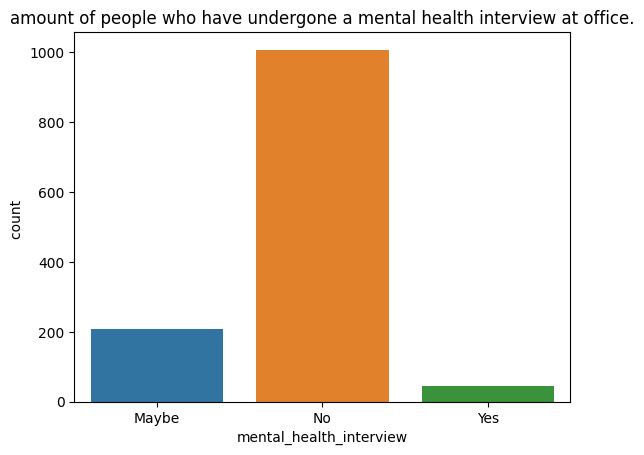

In [49]:
g=sns.countplot(data=df, x="mental_health_interview")
labels=labelDict['label_mental_health_interview']
g.set_xticklabels(labels)
plt.title('amount of people who have undergone a mental health interview at office.')
plt.ylabel('count ')

Text(0, 0.5, 'count')

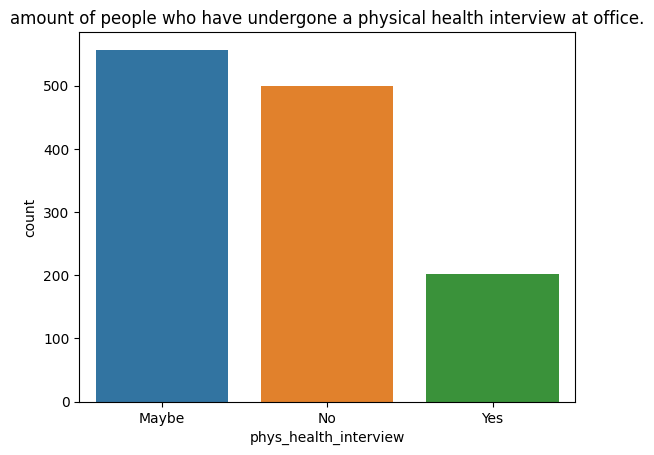

In [50]:
g=sns.countplot(data=df, x="phys_health_interview")
labels=labelDict['label_phys_health_interview']
g.set_xticklabels(labels)
plt.title('amount of people who have undergone a physical health interview at office.')
plt.ylabel('count')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


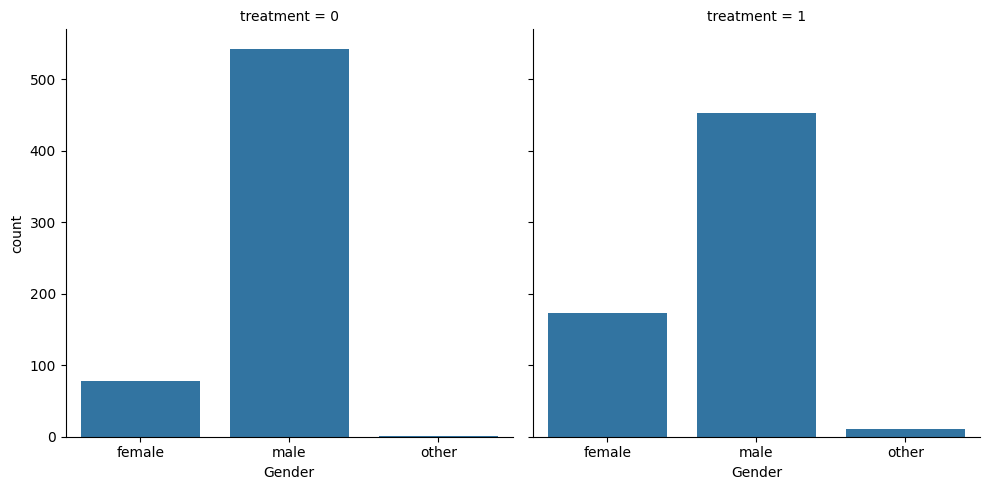

In [51]:



g = sns.FacetGrid(df, col='treatment',height=5)
g = g.map(sns.countplot, "Gender")
labels=labelDict['label_Gender']
g.set_xticklabels(labels)

In [52]:
#overall we can observe highest number of people who took treatment were males followed by females and others.
#But it can also be observed that there is a relative decrease in the number of males who took treatment with respect to those who dont.
#On the other hand number of people who took treatment under the category of both females, and others have increased with respect to those who didn't.

Text(0.5, 9.444444444444438, 'family history')

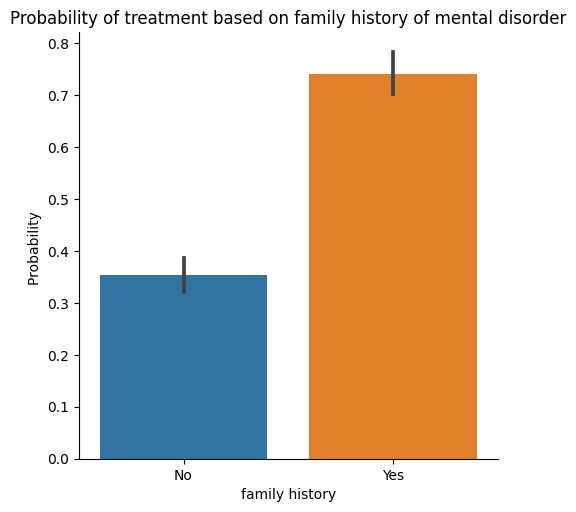

In [53]:
g=sns.catplot(x="family_history", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_family_history']
g.set_xticklabels(labels)
plt.title('Probability of treatment based on family history of mental disorder')
plt.ylabel('Probability ')
plt.xlabel('family history')

Text(9.444444444444445, 0.5, 'Probability ')

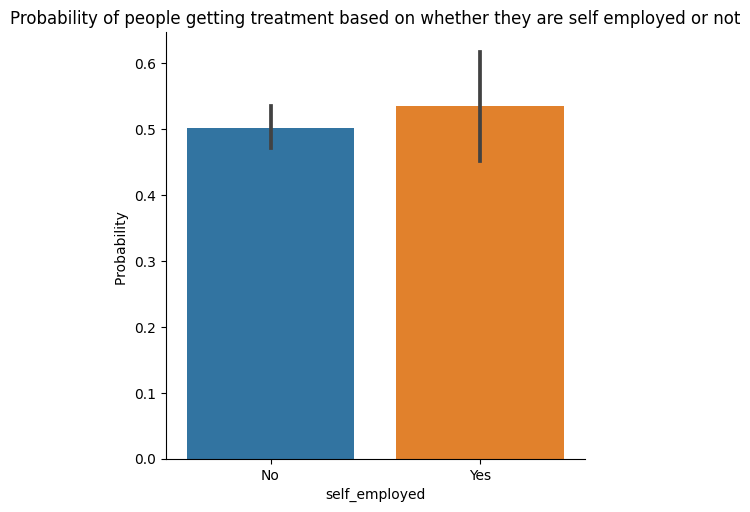

In [54]:
g=sns.catplot(x="self_employed", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_self_employed']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based on whether they are self employed or not')
plt.ylabel('Probability ')

Text(9.444444444444445, 0.5, 'Probability ')

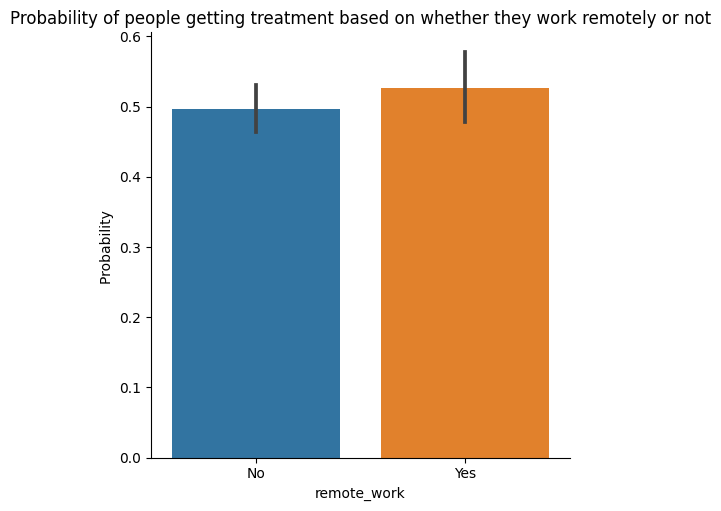

In [55]:
g=sns.catplot(x="remote_work", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_remote_work']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based on whether they work remotely or not')
plt.ylabel('Probability ')

Text(9.444444444444445, 0.5, 'Probability ')

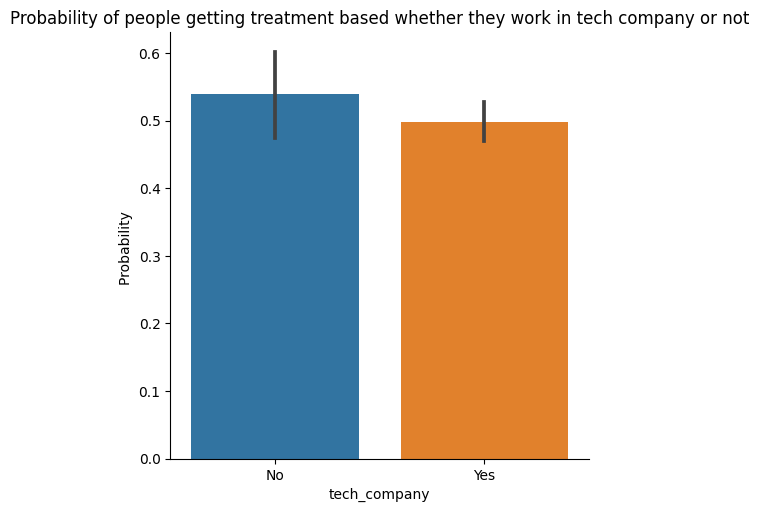

In [56]:
g=sns.catplot(x="tech_company", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_tech_company']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based whether they work in tech company or not')
plt.ylabel('Probability ')


Text(9.444444444444445, 0.5, 'Probability ')

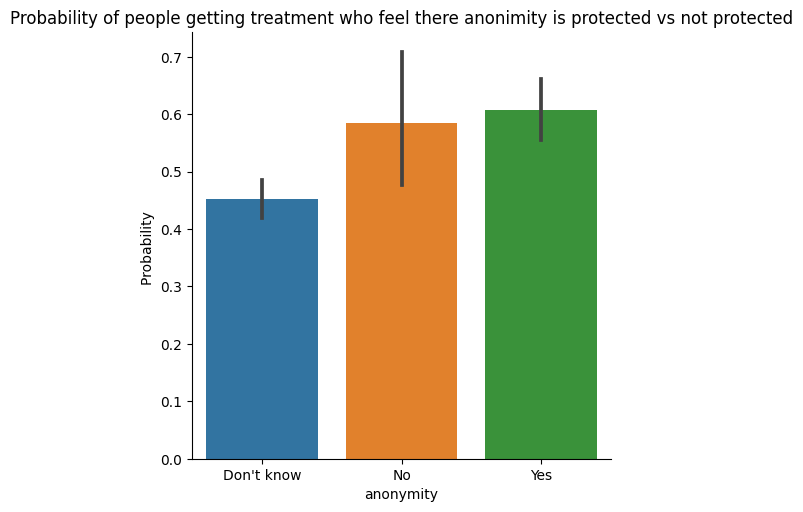

In [57]:
g=sns.catplot(x="anonymity", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_anonymity']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment who feel there anonimity is protected vs not protected')
plt.ylabel('Probability ')

Text(9.444444444444445, 0.5, 'Probability ')

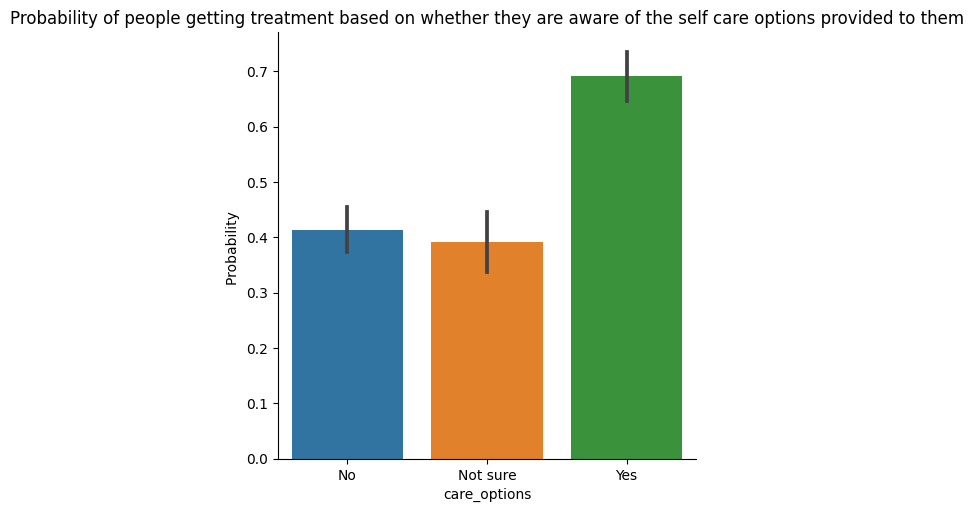

In [58]:
g=sns.catplot(x="care_options", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_care_options']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based on whether they are aware of the self care options provided to them')
plt.ylabel('Probability ')

Text(9.444444444444445, 0.5, 'Probability ')

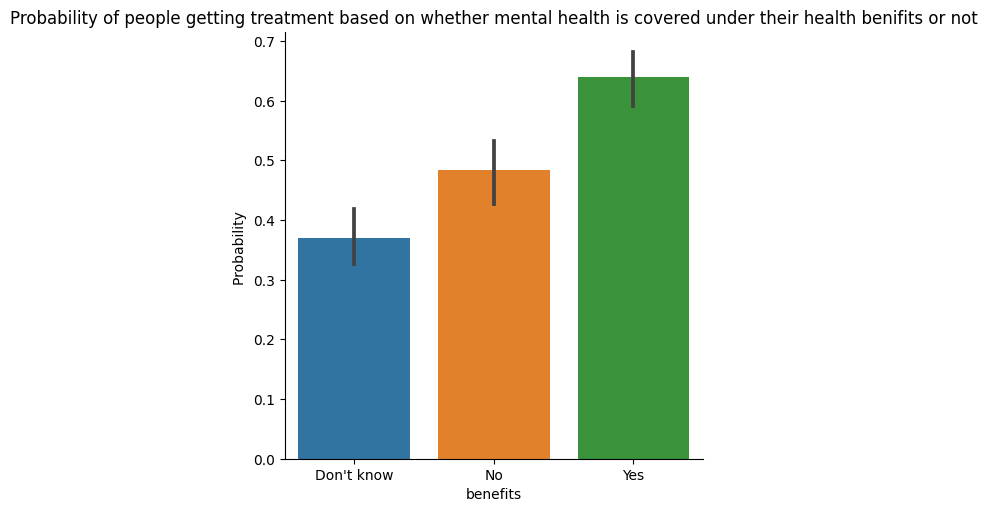

In [59]:
g=sns.catplot(x="benefits", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_benefits']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based on whether mental health is covered under their health benifits or not')
plt.ylabel('Probability ')

In [60]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,2,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,1,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,0,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


<Axes: >

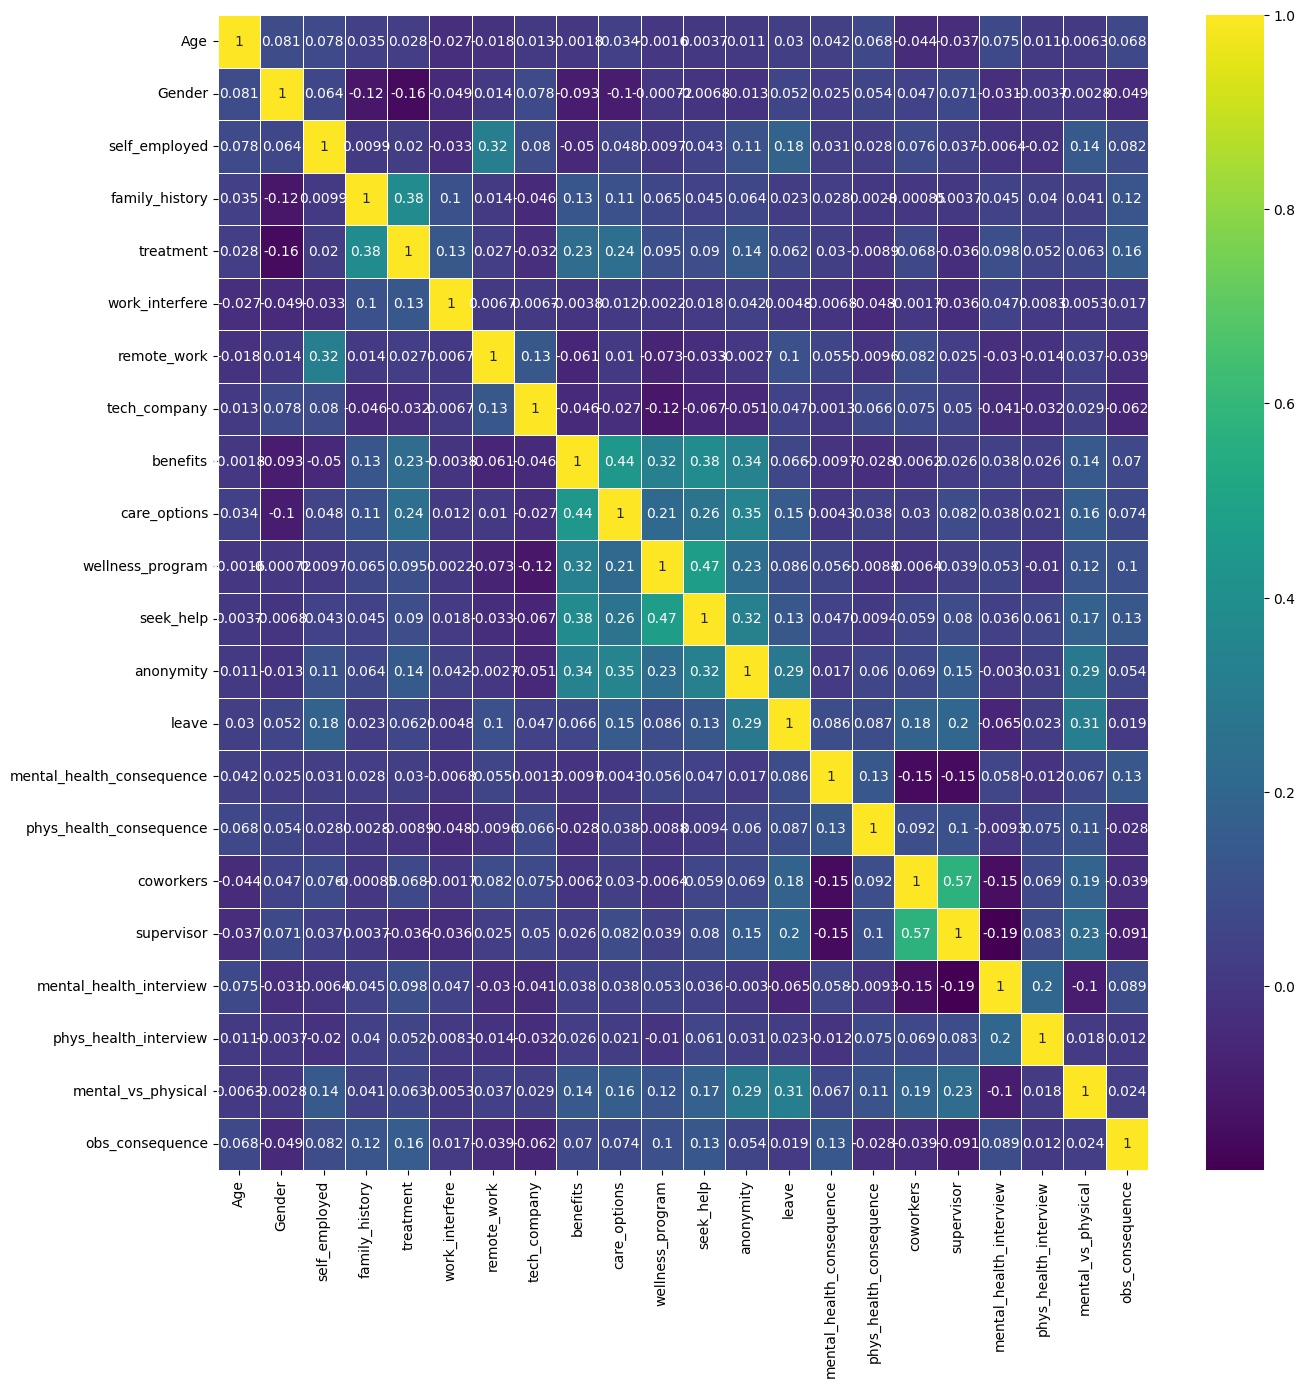

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

###Feature Selection

Shape of the dataframe without Feature Selection

In [ ]:
df.shape

In [62]:
target_column = 'treatment'

In [63]:
corr_matrix = df.corr()[target_column]

In [64]:
low_corr_cols = corr_matrix[abs(corr_matrix) < 0.1].index.tolist()

In [65]:
low_corr_cols

['Age',
 'self_employed',
 'remote_work',
 'tech_company',
 'wellness_program',
 'seek_help',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical']

In [66]:
df.drop(low_corr_cols, axis=1, inplace=True)

In [67]:
df.columns

Index(['Gender', 'family_history', 'treatment', 'work_interfere', 'benefits',
       'care_options', 'anonymity', 'obs_consequence'],
      dtype='object')

In [111]:
df.head()

,Gender,family_history,treatment,work_interfere,benefits,care_options,anonymity,obs_consequence
0,0,0,1,1,2,1,2,0
1,1,0,0,2,0,0,0,0
2,1,0,0,2,1,0,0,0
3,1,1,1,1,1,2,1,1
4,1,0,0,0,2,0,0,0


Shape of the Dataframe after Feature Selection

In [112]:
df.shape

(1259, 8)

### Models

In [68]:
X=df.copy()
X.drop(['treatment'],axis=1,inplace=True)
Y=df['treatment']
X.head()

,Gender,family_history,work_interfere,benefits,care_options,anonymity,obs_consequence
0,0,0,1,2,1,2,0
1,1,0,2,0,0,0,0
2,1,0,2,1,0,0,0
3,1,1,1,1,2,1,1
4,1,0,0,2,0,0,0


In [69]:
# scaler = MinMaxScaler()
# X['Age'] = scaler.fit_transform(X[['Age']])


In [70]:
X.shape

(1259, 7)

In [71]:
df['treatment'].value_counts()

1    637
0    622
Name: treatment, dtype: int64

In [72]:
# lda = LinearDiscriminantAnalysis(n_components=2)
# X1 = lda.fit_transform(X,Y)

In [73]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X,Y,test_size=0.2,random_state=70)

Model accuracy on train is:  0.7229394240317776
Model accuracy on test is:  0.6944444444444444
--------------------------------------------------
Model precision score on test is:  0.7
--------------------------------------------------
Model recall score on test is:  0.636
--------------------------------------------------
Model F1 score on test is:  0.667
--------------------------------------------------


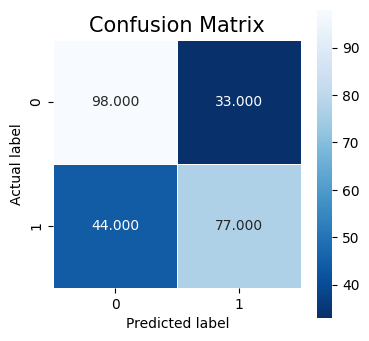

In [97]:
#fit the model on train data 
log_reg = LogisticRegression(max_iter=3000).fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds2),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds2),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds2),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds2)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

Model accuracy on train is:  0.7586891757696127
Model accuracy on test is:  0.7420634920634921
--------------------------------------------------
Model precision score on test is:  0.73
--------------------------------------------------
Model recall score on test is:  0.736
--------------------------------------------------
Model F1 score on test is:  0.733
--------------------------------------------------


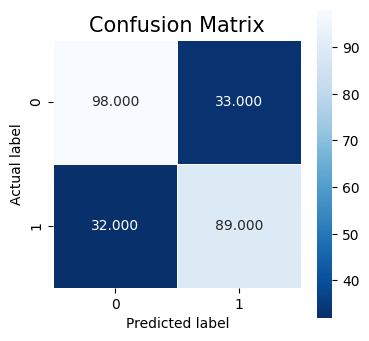

In [99]:
#fit the model on train data 
DT2 = DecisionTreeClassifier(max_depth= 4, min_samples_split= 10).fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds3),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds3),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds3),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds3)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [76]:
param_grid = {'max_depth': np.arange(1, 10),
              'min_samples_split': [2, 5, 10, 15, 20],
              }


In [77]:
grid_search = GridSearchCV(DT2, param_grid, cv=5)
grid_search.fit(X,Y)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'min_samples_split': 10}


Model accuracy on train is:  0.7666335650446872
Model accuracy on test is:  0.7420634920634921
--------------------------------------------------
Model precision score on test is:  0.75
--------------------------------------------------
Model recall score on test is:  0.694
--------------------------------------------------
Model F1 score on test is:  0.721
--------------------------------------------------


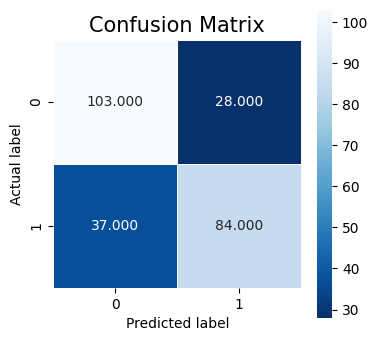

In [100]:
#fit the model on train data 
RF=RandomForestClassifier(max_depth= 5, min_samples_split=5, n_estimators=100).fit(X_train2,Y_train2)
#predict on train  
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds4),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds4),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds4),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds4)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [79]:
param_grid = {'n_estimators': [100,150 ,200, 300,400],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}


grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the data
grid_search.fit(X, Y)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best score:  0.7553500284575982


Model accuracy on train is:  0.7686196623634558
Model accuracy on test is:  0.746031746031746
--------------------------------------------------
Model precision score on test is:  0.766
--------------------------------------------------
Model recall score on test is:  0.678
--------------------------------------------------
Model F1 score on test is:  0.719
--------------------------------------------------


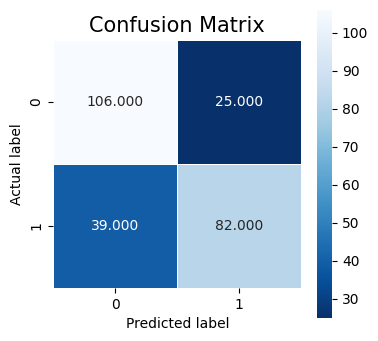

In [101]:
#fit the model on train data 
knn = KNeighborsClassifier(n_neighbors=19, p= 2, weights= 'uniform')
KNN=knn.fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds5),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds5),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds5),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds5)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [81]:
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Define the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the data
grid_search.fit(X, Y)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}
Best score:  0.7466135458167331


Model accuracy on train is:  0.7696127110228401
Model accuracy on test is:  0.753968253968254
--------------------------------------------------
Model precision score on test is:  0.752
--------------------------------------------------
Model recall score on test is:  0.727
--------------------------------------------------
Model F1 score on test is:  0.739
--------------------------------------------------


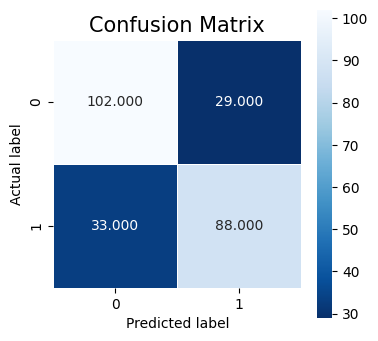

In [102]:
lgbm_clf = LGBMClassifier(learning_rate= 0.01, n_estimators = 165, num_leaves= 10).fit(X_train2, Y_train2)
#predict on train 
train_preds_lgbm = lgbm_clf.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds_lgbm))

#predict on test
test_preds_lgbm = lgbm_clf.predict(X_test2)

#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_lgbm))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_lgbm),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_lgbm),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_lgbm),3))
print('-'*50)


cm = confusion_matrix(Y_test2, test_preds_lgbm)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [83]:
params = {
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 150,180,200,250]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X, Y)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 10}
Best score:  0.7569499778663126


Model accuracy on train is:  0.7686196623634558
Model accuracy on test is:  0.75
--------------------------------------------------
Model precision score on test is:  0.727
--------------------------------------------------
Model recall score on test is:  0.769
--------------------------------------------------
Model F1 score on test is:  0.747
--------------------------------------------------


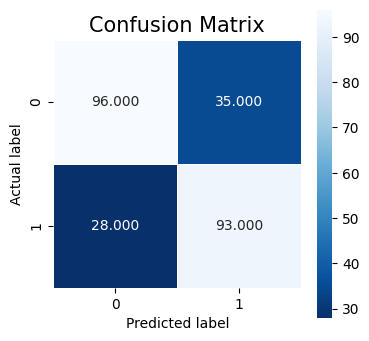

In [103]:
#fit the model on train data 
ada_clf = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 165).fit(X_train2,Y_train2)
#predict on train 
train_preds_ada = ada_clf.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds_ada))
#predict on test
test_preds_ada = ada_clf.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_ada))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_ada),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_ada),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_ada),3))
print('-'*50)

cm = confusion_matrix(Y_test2, test_preds_ada)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [85]:
parameters = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(ada_clf, parameters, cv=5)
grid.fit(X, Y)

# Print the best hyperparameters
print('Best hyperparameters:', grid.best_params_)

# Use cross-validation to evaluate the model with the best hyperparameters
best_model = AdaBoostClassifier(n_estimators=grid.best_params_['n_estimators'], 
                                learning_rate=grid.best_params_['learning_rate'])

scores = cross_val_score(best_model, X, Y, cv=5)
print('Cross-validation scores:', scores)
print('Average score:', scores.mean())

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Cross-validation scores: [0.75       0.79761905 0.75396825 0.76587302 0.74103586]
Average score: 0.7616992348068046


Model accuracy on train is:  0.7904667328699106
Model accuracy on test is:  0.7420634920634921
--------------------------------------------------
Model precision score on test is:  0.741
--------------------------------------------------
Model recall score on test is:  0.711
--------------------------------------------------
Model F1 score on test is:  0.726
--------------------------------------------------


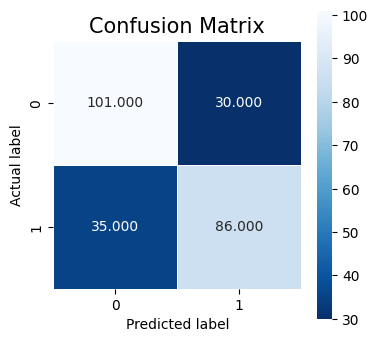

In [104]:
#fit the model on train data 
et_clf = ExtraTreesClassifier(max_depth = 7, min_samples_leaf = 1, min_samples_split= 3, n_estimators= 75).fit(X_train2,Y_train2)
#predict on train 
train_preds_et = et_clf.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds_et))
#predict on test
test_preds_et = et_clf.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_et))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_et),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_et),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_et),3))
print('-'*50)

cm = confusion_matrix(Y_test2, test_preds_et)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [87]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
}

# Define the cross-validation
cv = 5

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=et_clf, param_grid=param_grid, cv=cv)

# Fit the model
grid_search.fit(X, Y)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Model accuracy on train is:  0.7696127110228401
Model accuracy on test is:  0.7420634920634921
--------------------------------------------------
Model precision score on test is:  0.73
--------------------------------------------------
Model recall score on test is:  0.736
--------------------------------------------------
Model F1 score on test is:  0.733
--------------------------------------------------


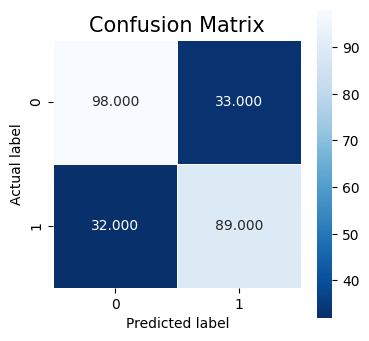

In [106]:
#fit the model on train data 
sv_clf = SVC(C= 2, coef0 = 0.0, degree = 2, gamma= 'auto', kernel= 'rbf').fit(X_train2, Y_train2)
#predict on train 
train_preds_sv = sv_clf.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds_sv))
#predict on test
test_preds_sv = sv_clf.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_sv))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_sv),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_sv),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_sv),3))
print('-'*50)

cm = confusion_matrix(Y_test2, test_preds_sv)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [89]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5]
}

# Define the cross-validation
cv = 5

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=sv_clf, param_grid=param_grid, cv=cv)

# Fit the model
grid_search.fit(X, Y)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 1, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


Model accuracy on train is:  0.7279046673286991
Model accuracy on test is:  0.753968253968254
--------------------------------------------------
Model precision score on test is:  0.776
--------------------------------------------------
Model recall score on test is:  0.686
--------------------------------------------------
Model F1 score on test is:  0.728
--------------------------------------------------


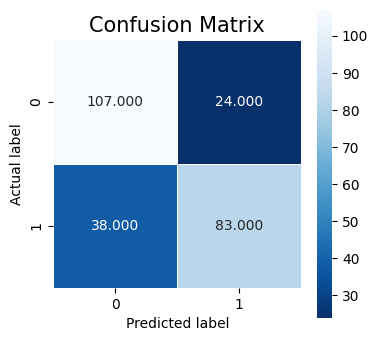

In [108]:
#fit the model on train data 
clf = BernoulliNB(force_alpha=True,alpha = 0.1, fit_prior = False).fit(X_train2, Y_train2)
train_preds = clf.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds))

#predict on test
test_preds = clf.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds),3))
print('-'*50)

cm = confusion_matrix(Y_test2, test_preds)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Define the cross-validation
cv = 5

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv)

# Fit the model
grid_search.fit(X, Y)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Model accuracy on train is:  0.717974180734856
Model accuracy on test is:  0.6904761904761905
--------------------------------------------------
Model precision score on test is:  0.697
--------------------------------------------------
Model recall score on test is:  0.628
--------------------------------------------------
Model F1 score on test is:  0.661
--------------------------------------------------


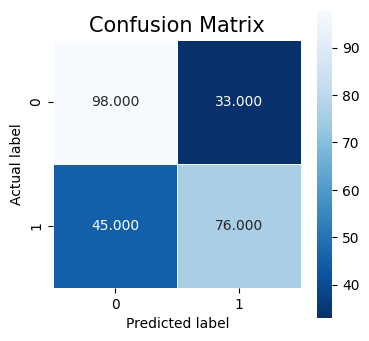

In [110]:
lda = LinearDiscriminantAnalysis(solver = 'svd', tol = 0.0001).fit(X_train2, Y_train2)
train_preds = lda.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds))

#predict on test
test_preds_lda = lda.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_lda))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_lda),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_lda),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_lda),3))
print('-'*50)

cm = confusion_matrix(Y_test2, test_preds_lda)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [94]:

# Define the hyperparameters to tune
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Define the grid search object
grid_search = GridSearchCV(lda, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train2, Y_train2)


# Get the best estimator from the grid search
best_lda = grid_search.best_params_
print("best hyper parameters :",best_lda)

best hyper parameters : {'solver': 'svd', 'tol': 0.0001}
